### Group Members:
    
 - Aiswarya S Parvathy
 - Vengadesh S
 - Nipun Gupta   

### Objective: 

Build a prediction model to predict whether a review on the restaurant is positive or negative.

### Importing pandas

In [1]:
import pandas as pd
import numpy as np

Reading the csv dataset as a pandas dataframe

In [2]:
Rest_rev = pd.read_csv('RestaurantReview.csv')

In [3]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
Rest_rev.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


Checking details of the dataframe

In [5]:
Rest_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Liked    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
Rest_rev.columns

Index([' Review', 'Liked'], dtype='object')

The column **Review** has a leading space in its name. So we can rename the column to remove this leading space

In [7]:
Rest_rev = Rest_rev.rename(columns={' Review':'Review'})

In [8]:
Rest_rev.columns

Index(['Review', 'Liked'], dtype='object')

The leading space has been removed from the **Review** column

Checking for presence of missing values

In [9]:
Rest_rev.isnull().sum()

Review    0
Liked     0
dtype: int64

There are no missing values in the dataframe

Checking for presence of duplicates

In [10]:
Rest_rev.duplicated(subset=None, keep='first').sum()

4

There are 4 duplicate records in the dataframe

In [11]:
Rest_rev.shape

(1000, 2)

Removing the duplicate records

In [12]:
Rest_rev = Rest_rev[Rest_rev.duplicated(Rest_rev.columns.tolist(), keep='first')==False]

In [13]:
Rest_rev.duplicated(subset=None, keep='first').sum()

0

In [14]:
Rest_rev.shape

(996, 2)

Duplicate records have been removed from the dataframe

In [15]:
Rest_rev.reset_index(inplace = True, drop = True)

Indices have been reset

In [16]:
Rest_rev.groupby('Liked').describe()

Review                                      
       count unique                       top freq
Liked                                             
0      497    497    Crust is not good.        1  
1      499    499    Wow... Loved this place.  1

The following conclusions can be drawn from the above result:

 - The count of negative reviews is 497
 - The count of positive reviews is 499

Let's create a new column to detect how long the text messages are

In [17]:
Rest_rev['Length'] = Rest_rev['Review'].apply(len)

In [18]:
Rest_rev.head(10)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,87
4,The selection on the menu was great and so were the prices.,1,59
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0,111
8,The fries were great too.,1,25
9,A great touch.,1,14


As we can observe that there is no specific pattern of length that determines whether a review is positive or negative, so the legnth of a review does not help much in determining the sentiment of the review for this use case

## Data Visualization

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

#### Plotting histogram

Text(0.5, 0, 'Length of Review')

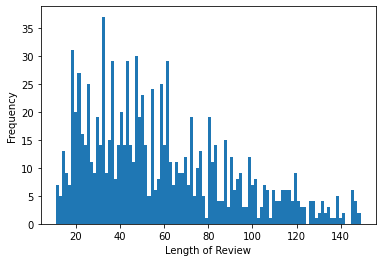

In [20]:
Rest_rev['Length'].plot(bins=100, kind='hist')
plt.xlabel('Length of Review')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

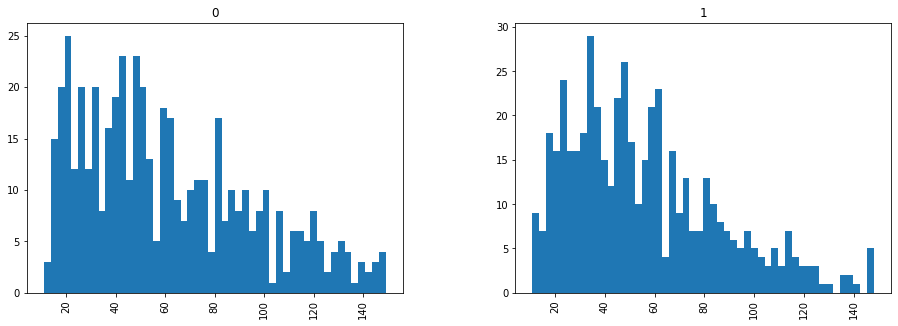

In [21]:
Rest_rev.hist(column='Length', by='Liked', bins=50, figsize=(15,5))

It can be observed from the above histogram that most of the Reviews are having lengths ranging from **20** to **60**

In [22]:
Rest_rev.Length.describe()

count    996.000000
mean     58.459839 
std      32.341292 
min      11.000000 
25%      33.000000 
50%      51.000000 
75%      80.000000 
max      149.000000
Name: Length, dtype: float64

The following conclusions can be drawn from the above result:

 - The mean length of reviews is 58
 - The minimum length of a reviews is 11
 - The maximum length of a review is 149

#### Plotting countplot

Value count for feature Liked
1    499
0    497
Name: Liked, dtype: int64


<Axes: xlabel='Liked', ylabel='count'>

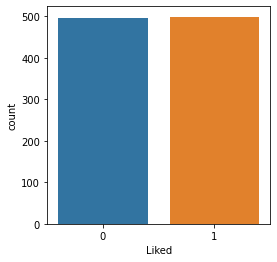

In [23]:
plt.figure(figsize=(4,4))
print("Value count for feature Liked")
print(Rest_rev['Liked'].value_counts())
sns.countplot(x='Liked',data=Rest_rev)

It can be observed that the dataframe is balanced

**Cleaning the punctuation marks**

In [24]:
import re
import string

List of punctuation marks to be removed

In [25]:
print(list(string.punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [26]:
def remove_punctuation(text):
    no_punct = "".join([c if c not in string.punctuation else " " for c in text])
    return no_punct

In [27]:
Rest_rev['Review'] = Rest_rev['Review'].apply(lambda x: remove_punctuation(x))

Converting all uppercase characters to lowercase

In [28]:
Rest_rev['Review'] = Rest_rev['Review'].str.lower()

Eliminating the numbers from the **Review** column as they do not contribute in predicting the sentiment of a review

In [29]:
Rest_rev['Review'] = [re.sub('\d+', '', e) for e in Rest_rev['Review']]

Removing unnecessary spaces from the text

In [30]:
Rest_rev['Review'] = [re.sub('\s+', ' ', e) for e in Rest_rev['Review']]

Removing leading or trailing spaces from the text

In [31]:
Rest_rev['Review'] = Rest_rev['Review'].str.strip()

#### Importing nltk

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenization

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
Rest_rev['Review'] = Rest_rev['Review'].apply(word_tokenize)

In [35]:
Rest_rev.head()

,Review,Liked,Length
0,"[wow, loved, this, place]",1,24
1,"[crust, is, not, good]",0,18
2,"[not, tasty, and, the, texture, was, just, nasty]",0,41
3,"[stopped, by, during, the, late, may, bank, holiday, off, rick, steve, recommendation, and, loved, it]",1,87
4,"[the, selection, on, the, menu, was, great, and, so, were, the, prices]",1,59


The **Review** column has been tokenized i.e. split into tokens/pieces

#### Removing the stopwords

In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading the **English** language stopwords

In [37]:
stopwords_english = stopwords.words('english')

List of english stopwords

In [38]:
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Certain words in the above including **not**, **until**, **while**, **against** etc may contribute to the sentiment of a review. So they may need to be retained in the review and thus need to be removed from the above list

In [39]:
stopwords_english_set = set(stopwords_english)

In [40]:
stopwords_english_set = stopwords_english_set.difference({'until', 'while', 'against', 'between', 'during', 'before', 'after', 'above', 'below', 'not'})

In [41]:
stopwords_english = list(stopwords_english_set)

In [42]:
print(stopwords_english)

['are', 'don', 'own', "couldn't", "mustn't", 'him', 'ourselves', "it's", 'most', 'mightn', 'or', 'few', 'each', 'than', "needn't", 'how', 'aren', 'does', 'some', 'such', 'for', 'what', 'once', 'can', 'o', 'again', 'up', 'by', 'other', 'just', 'me', 'didn', 'to', 'where', 'doing', 'myself', 'hers', 'an', "you'd", "doesn't", 'at', "wouldn't", 'yourselves', 'and', 'no', 'this', 'm', 'the', "didn't", 'it', "you've", 'was', 'yours', "haven't", 'who', 'over', 'we', 'out', 'they', 'been', 'under', 'that', 'ma', "she's", 'through', 'these', 'shouldn', 'you', 'but', 'll', 'so', 'were', 'because', "won't", 'both', 'all', "shan't", 'there', 'its', 'themselves', "mightn't", "should've", 'then', 't', 'being', 'yourself', 'in', 'nor', 'only', 'mustn', 'his', 'he', 'more', 's', "you'll", 'couldn', 'weren', 'wouldn', 'down', 'herself', 'them', 'shan', 'hasn', 'isn', "aren't", "shouldn't", 'from', 're', 'she', "that'll", "hadn't", "isn't", 'is', 'whom', 'won', 'y', 'my', 'your', 'now', 'am', 'will', 't

In [43]:
def remove_stopwords(text):        
    words = [w for w in text if w not in stopwords_english]
    return words

In [44]:
Rest_rev['Review'] = Rest_rev['Review'].apply(lambda x: remove_stopwords(x))

In [45]:
Rest_rev.head()

,Review,Liked,Length
0,"[wow, loved, place]",1,24
1,"[crust, not, good]",0,18
2,"[not, tasty, texture, nasty]",0,41
3,"[stopped, during, late, may, bank, holiday, rick, steve, recommendation, loved]",1,87
4,"[selection, menu, great, prices]",1,59


The stopwords have been removed from the **Review** column

#### Lemmatization of Reviews

**Lemmatization** shorten words back to their root form. **Lemmatizing** maps common words into one base. It returns a proper word that can be found in the dictionary

To implement Lemmatization using NLTK, we require **wordnet** and **WordNetLemmatizer**

In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
from nltk.stem import WordNetLemmatizer

In [48]:
lemmatizer = WordNetLemmatizer()

In [49]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [50]:
Rest_rev['Review'] = Rest_rev['Review'].apply(lambda x: word_lemmatizer(x))

In [51]:
Rest_rev.head()

,Review,Liked,Length
0,"[wow, loved, place]",1,24
1,"[crust, not, good]",0,18
2,"[not, tasty, texture, nasty]",0,41
3,"[stopped, during, late, may, bank, holiday, rick, steve, recommendation, loved]",1,87
4,"[selection, menu, great, price]",1,59


Renaming the preprocessed Review to **cleaned_Review**

In [52]:
Rest_rev = Rest_rev.rename(columns={'Review':'cleaned_Review'})

In [53]:
Rest_rev.columns

Index(['cleaned_Review', 'Liked', 'Length'], dtype='object')

In [54]:
Rest_rev.to_csv('Rest_rev_1.csv', index=False)

In [55]:
Rest_rev = pd.read_csv('Rest_rev_1.csv')

#### WorldCloud

#### Train Test split

Splitting the dataframe into train and test

In [56]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
df_train, df_test = train_test_split(Rest_rev, test_size = 0.3, random_state = 42, shuffle=True)

Resetting the indices of the training and testing dataframes

In [57]:
df_train.reset_index(inplace = True, drop = True)

In [58]:
df_test.reset_index(inplace = True, drop = True)

In [59]:
df_train.head()

,cleaned_Review,Liked,Length
0,"['disappointed', 'ordered', 'big', 'bay', 'plater']",0,54
1,"['every', 'time', 'eat', 'see', 'caring', 'teamwork', 'professional', 'degree']",1,70
2,"['food', 'par', 'denny', 'say', 'not', 'good']",0,72
3,"['interesting', 'part', 'town', 'place', 'amazing']",1,54
4,"['not', 'good', 'stretch', 'imagination']",0,43


In [60]:
df_test.head()

,cleaned_Review,Liked,Length
0,['excellent'],1,20
1,"['server', 'suck', 'wait', 'correction', 'server', 'heimer', 'sucked']",0,62
2,['back'],1,19
3,"['hate', 'thing', 'much', 'cheap', 'quality', 'black', 'olive']",0,58
4,"['think', 'going', 'back', 'anytime', 'soon']",0,47


The indices have been reset

#### Creating a TF-IDF object

We will create an object for **TfidfVectorizer** to convert the text data into a numeric representation/vector representation

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

Multinomial classifiers are quite useful when working with text data. Since **Multinomial Naive Bayes** algorithm is  useful for discrete counts, we can use **MultinomialNB**

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
from sklearn.pipeline import make_pipeline

We have set some parameters in the TfidfVectorizer. **max_df=0.15** means that only the words whose frequency of occurrence in the documents is a maximum of 0.15 will be considered whereas the words having frequency higher than 0.15 will not be considered as they will not matter much since they are commonly occurring in the document.

In [64]:
vectorizer_tf = TfidfVectorizer(max_df=0.15, min_df=0, max_features=10000, use_idf=False,norm=None)

We can use **make_pipeline()** function to take the output of **TfidfVectorizer()** and push that to the **MultinomialNB()**.

In [65]:
model = make_pipeline(vectorizer_tf, MultinomialNB())

Training the model

In [66]:
model.fit(df_train.cleaned_Review, df_train.Liked)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.15, max_features=10000, min_df=0,
                                 norm=None, use_idf=False)),
                ('multinomialnb', MultinomialNB())])

Making predictions on the testing dataset

In [67]:
labels = model.predict(df_test.cleaned_Review)

Plotting a **confusion matrix**

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
mat = confusion_matrix(df_test.Liked, labels)

Text(91.68, 0.5, 'Predicted label')

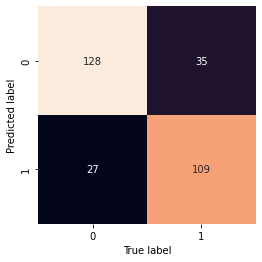

In [70]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

The following observations can be concluded about the performance:
    
 - 128 is the number of true positives i.e. The number of actual negative reviews that were predicted negatively be the model
 - 109 is the number of true negatives i.e. The number of actual positive reviews that were predicted positively be the model
 - 27 is the number of false positives i.e. The number of actual negative reviews that were predicted positively be the model
 - 35 is the number of false negatives i.e. The number of actual positive reviews that were predicted negatively be the model

In [71]:
score = accuracy_score(df_test.Liked, labels)

In [72]:
score

0.7926421404682275

The accuracy score of the **MultinomialNB** model is 79.26%

In [73]:
report = classification_report(df_test.Liked, labels)

In [74]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       155
           1       0.80      0.76      0.78       144

    accuracy                           0.79       299
   macro avg       0.79      0.79      0.79       299
weighted avg       0.79      0.79      0.79       299



#### Creating a Word2Vec object

Using TfIdf, we will not get much semantic information about the text. To overcome this drawback, we will use the concept of word embeddings. **Word2Vec** is a word embedding technique

In [75]:
import gensim

In [76]:
from gensim.models import  Word2Vec

In [77]:
Rest_rev.head()

,cleaned_Review,Liked,Length
0,"['wow', 'loved', 'place']",1,24
1,"['crust', 'not', 'good']",0,18
2,"['not', 'tasty', 'texture', 'nasty']",0,41
3,"['stopped', 'during', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved']",1,87
4,"['selection', 'menu', 'great', 'price']",1,59


In [78]:
Rest_rev['cleaned_Review_processed'] = Rest_rev['cleaned_Review'].apply(eval)

In [79]:
sentences = []
for i in Rest_rev['cleaned_Review_processed']:
  sentences.append(i)

In [80]:
len(sentences)

996

In [81]:
sentences[:5]

[['wow', 'loved', 'place'],
 ['crust', 'not', 'good'],
 ['not', 'tasty', 'texture', 'nasty'],
 ['stopped',
  'during',
  'late',
  'may',
  'bank',
  'holiday',
  'rick',
  'steve',
  'recommendation',
  'loved'],
 ['selection', 'menu', 'great', 'price']]

In [82]:
print(gensim.__version__)

4.3.1


In [83]:
# upgrade gensim library if the version is lower
if gensim.__version__ != '4.3.1':
  !pip install --upgrade gensim

In [84]:
embedding_size = 58
# If there is error while instantiating Word2Vec model, then try restarting the runtime and running entire code again 
model_Word2Vec = Word2Vec(sentences, vector_size = embedding_size, window=10, min_count=2, sg=0, workers=4)

In [85]:
print(model_Word2Vec)

Word2Vec<vocab=750, vector_size=58, alpha=0.025>


In [86]:
print(model_Word2Vec.wv.key_to_index.keys())

dict_keys(['food', 'not', 'place', 'good', 'service', 'great', 'back', 'time', 'like', 'go', 'really', 'best', 'would', 'restaurant', 'ever', 'one', 'friendly', 'also', 'never', 'nice', 'amazing', 'delicious', 'vega', 'pretty', 'came', 'experience', 'get', 'even', 'disappointed', 'u', 'definitely', 'eat', 'staff', 'minute', 'love', 'server', 'bad', 'going', 'got', 'chicken', 'steak', 'pizza', 'much', 'star', 'first', 'salad', 'price', 'made', 'say', 'dish', 'better', 'could', 'way', 'menu', 'burger', 'think', 'well', 'always', 'worst', 'wait', 'flavor', 'meal', 'table', 'fresh', 'want', 'ordered', 'quality', 'went', 'feel', 'thing', 'sushi', 'order', 'taste', 'fantastic', 'awesome', 'selection', 'enough', 'night', 'everything', 'after', 'buffet', 'still', 'fry', 'know', 'atmosphere', 'bland', 'slow', 'next', 'come', 'sauce', 'tasty', 'perfect', 'sandwich', 'side', 'waited', 'another', 'recommend', 'coming', 'loved', 'meat', 'breakfast', 'worth', 'little', 'lunch', 'excellent', 'probabl

In [87]:
len(model_Word2Vec.wv.index_to_key)

750

In [88]:
model_Word2Vec.wv.get_vector('would')

array([ 0.01514115, -0.00961324, -0.00660453,  0.00603276,  0.01852614,
       -0.01069007,  0.01285774,  0.02042692, -0.01465452,  0.00351323,
        0.00599983, -0.00313249, -0.00995846, -0.00843316,  0.00095628,
       -0.00433648,  0.01034943, -0.00972805,  0.00560699,  0.0055531 ,
        0.00647502, -0.00054925, -0.0134326 , -0.01639961,  0.00751316,
        0.00944268, -0.00824922, -0.02143599, -0.01703957,  0.00579688,
       -0.00285452,  0.01546   , -0.00699451,  0.01531813, -0.00690597,
        0.01197001,  0.00191412, -0.01845955, -0.00562164,  0.00045019,
       -0.00959364,  0.00189218, -0.01729416,  0.00124275,  0.01724606,
        0.00382173, -0.0099143 ,  0.00651468,  0.01528347, -0.01314945,
       -0.00945721, -0.00932372,  0.01733777, -0.00129032, -0.01784691,
       -0.00743761,  0.02301976, -0.01067937], dtype=float32)

In [89]:
model_Word2Vec.wv.get_vector('burger')

array([ 0.00613442, -0.00694826, -0.010933  ,  0.01257101,  0.00759333,
       -0.01254189, -0.00170843,  0.00350105, -0.00418407, -0.01087684,
        0.01156552,  0.0064156 ,  0.01249212,  0.01029224, -0.00549632,
        0.00261995,  0.00111417, -0.02277492,  0.01981442,  0.01808374,
        0.01515407, -0.00744275, -0.01657623,  0.008225  , -0.00618441,
        0.01213085, -0.00571582,  0.00431126,  0.00705072, -0.00470236,
        0.00030822,  0.00631908,  0.02162053, -0.0120799 ,  0.00083495,
        0.00241429,  0.01215491,  0.00419304, -0.00693927,  0.00854627,
       -0.0072486 ,  0.00977073,  0.00980621,  0.0027151 , -0.00606677,
        0.00263634,  0.00513194,  0.01712318,  0.01063962, -0.00830426,
       -0.000441  , -0.01533537, -0.00621262,  0.00222831, -0.0132033 ,
       -0.0168477 ,  0.0209992 ,  0.01839776], dtype=float32)

In [90]:
model_Word2Vec.corpus_count

996

In [91]:
model_Word2Vec.epochs

5

In [92]:
def document_vector(doc):
  #Create document vectors by averaging the word vectors. Remove the out of vocabulary words
  doc1 = [word for word in doc if word in model_Word2Vec.wv.index_to_key]
  #So essentially, doc1 is a collection of those words which are a part of the vocab

  wv1 = []

  for word in doc1:
    wv1.append(model_Word2Vec.wv.get_vector(word))
  wv1 = np.array(wv1) #Converting wv1 into a numpy array
  wv1_mean = wv1.mean(axis = 0)
  return wv1_mean

In [93]:
# Generate word vectors for the documents
Review_temp = Rest_rev['cleaned_Review_processed'].apply(document_vector)

<ipython-input-92-f15024310f4b>:11: RuntimeWarning: Mean of empty slice.
  wv1_mean = wv1.mean(axis = 0)


In [94]:
Review_vec = np.ones((len(Review_temp), embedding_size))*np.nan

In [95]:
for i in range(Review_vec.shape[0]):
  Review_vec[i,:] = Review_temp.iloc[i]

In [96]:
Review_vec.shape

(996, 58)

In [97]:
Rest_rev_vectorized = pd.DataFrame(Review_vec)

In [98]:
Rest_rev_vectorized['Target'] = Rest_rev['Liked']

In [99]:
Rest_rev_vectorized.dropna(how='any', axis=0, inplace=True)

In [100]:
Rest_rev_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,Target
0,0.003592,0.006200,-0.013609,-0.004918,0.000450,-0.004865,0.004152,0.003265,-0.001836,0.000402,...,0.001226,0.013196,-0.012292,0.008281,-0.006230,-0.002041,-0.006412,0.004471,0.001397,1
1,0.002502,0.001749,-0.006505,-0.005505,0.004584,-0.012269,-0.009285,0.004965,-0.008709,0.007086,...,0.000537,0.001469,-0.005735,0.005812,-0.001860,-0.010096,0.006853,0.010440,0.003866,0
2,-0.001049,0.011581,0.001636,-0.007049,0.001204,-0.006640,-0.002933,0.006772,-0.002908,0.008271,...,0.004912,-0.006462,-0.014360,-0.000134,-0.003848,-0.006394,0.001559,0.003041,-0.000569,0
3,-0.003374,-0.000343,-0.002204,0.002629,0.000738,-0.001872,-0.001381,0.006825,0.000895,0.001059,...,0.002622,0.003508,0.001383,0.001170,-0.008589,-0.001474,-0.000349,0.007294,0.002740,1
4,0.000676,0.006174,-0.000149,0.000358,0.011925,-0.000339,0.000089,-0.003297,0.002364,0.004042,...,-0.002201,0.002006,0.002768,0.001092,0.007932,-0.000372,0.003050,0.007874,0.000308,1


In [101]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
df_train1, df_test1 = train_test_split(Rest_rev_vectorized, test_size = 0.3, random_state = 42, shuffle=True)

In [102]:
df_train1.reset_index(inplace = True, drop = True)

In [103]:
df_test1.reset_index(inplace = True, drop = True)

In [104]:
df_train1.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,Target
0,0.001032,0.000390,0.001382,-0.003552,0.005591,-0.004969,-0.011877,0.002960,-0.003761,-0.001058,...,-0.002032,0.003055,-0.005942,0.000138,-0.001429,-0.000574,-0.002846,0.004050,0.002850,1
1,0.005230,-0.002319,-0.002827,0.001890,0.006555,-0.002547,-0.003673,0.005552,0.003718,-0.000349,...,-0.006174,0.004742,-0.012183,0.011720,-0.001388,-0.008966,-0.000782,0.009274,-0.009748,1
2,-0.007387,0.006124,-0.004123,0.002820,-0.003838,-0.000205,0.003008,0.004009,0.002874,0.011969,...,-0.000128,0.001440,-0.005287,-0.003074,-0.014477,0.003678,-0.000405,0.014824,0.010847,0
3,-0.008482,0.006125,-0.016140,-0.006167,-0.001760,0.008758,-0.003195,0.001279,-0.002795,-0.004910,...,-0.010779,-0.013375,0.003109,-0.005776,-0.009384,-0.011742,-0.001631,0.016312,0.000684,0
4,0.006600,-0.006189,-0.002084,0.003585,-0.006431,-0.014261,-0.006165,0.007689,-0.003996,0.012511,...,-0.002441,0.003541,-0.004319,0.004384,-0.001213,0.002344,-0.002915,0.007891,0.008054,1


In [105]:
df_test1.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,Target
0,0.009019,0.015043,-0.001697,0.003527,0.004379,-0.004334,-0.001727,0.017681,-0.005322,0.007757,...,-0.003315,0.016576,0.003404,-0.016255,-0.006841,-0.010042,0.003220,-0.004463,0.008135,0
1,0.003830,0.007007,-0.003462,-0.013122,0.013055,-0.005710,-0.003722,0.008124,-0.001790,-0.011298,...,0.005368,0.007101,-0.007117,0.002455,-0.010168,0.011496,-0.009973,0.013363,-0.000836,1
2,-0.005493,0.007423,-0.009414,-0.001704,0.004094,0.002563,0.000903,0.008062,-0.009580,0.018646,...,0.004868,0.008023,-0.001219,0.006014,-0.001435,-0.006654,0.002052,0.004817,-0.005159,1
3,-0.001423,0.001791,-0.011134,0.006362,0.007273,0.003615,0.008489,0.003788,-0.013533,0.006854,...,0.006743,0.004705,0.001386,0.010047,-0.007717,-0.004867,0.002452,0.010315,-0.000554,1
4,0.000536,0.009768,-0.010319,0.001572,-0.000409,-0.007702,-0.007633,-0.001926,-0.008482,0.005568,...,-0.004592,0.004905,-0.004906,0.000526,-0.007790,-0.001776,-0.008898,0.015796,0.007979,0


In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaling = MinMaxScaler()

In [108]:
X_train_scaled = scaling.fit_transform(df_train1.iloc[:,:-1])

In [109]:
X_train_scaled

array([[0.51681022, 0.46763097, 0.59490307, ..., 0.49267784, 0.52354291,
        0.5325493 ],
       [0.641503  , 0.37921436, 0.47610182, ..., 0.54751041, 0.66580144,
        0.14907117],
       [0.26678274, 0.65475835, 0.43952469, ..., 0.55751479, 0.81694325,
        0.77598058],
       ...,
       [0.59761232, 0.61961108, 0.38828027, ..., 0.48725735, 0.45972414,
        0.38627663],
       [0.6586812 , 0.47895685, 0.33018522, ..., 0.43757887, 0.51753602,
        0.6012719 ],
       [0.15488892, 0.46586378, 0.41969748, ..., 0.37702902, 0.52662433,
        0.8685595 ]])

In [110]:
X_train = pd.DataFrame(X_train_scaled, columns=df_train1.iloc[:,:-1].columns)

In [111]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.493095,0.494255,0.467464,0.467679,0.514273,0.476407,0.492299,0.540088,0.490577,0.514733,...,0.506383,0.508575,0.516051,0.480887,0.524188,0.511395,0.438265,0.459840,0.572664,0.488643
std,0.167996,0.180231,0.158565,0.155456,0.162337,0.173584,0.161383,0.161204,0.144130,0.165502,...,0.170196,0.165241,0.180016,0.151625,0.179950,0.161857,0.172894,0.151611,0.165650,0.173621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386356,0.383975,0.366251,0.377531,0.417618,0.363713,0.383336,0.438431,0.405580,0.413134,...,0.397416,0.414723,0.405120,0.391830,0.412235,0.410329,0.325690,0.359768,0.472707,0.372150
50%,0.490479,0.481472,0.464605,0.462261,0.515578,0.482198,0.500242,0.543169,0.488084,0.517013,...,0.508203,0.510063,0.523770,0.477151,0.528353,0.517584,0.431397,0.458741,0.578423,0.487890
75%,0.593468,0.601580,0.566336,0.562467,0.608813,0.578854,0.591660,0.639159,0.573482,0.622491,...,0.613577,0.601143,0.626816,0.567983,0.638207,0.620202,0.541332,0.557412,0.685402,0.602742
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
X_test_scaled = scaling.transform(df_test1.iloc[:,:-1])

In [113]:
X_test_scaled

array([[0.75402157, 0.9458886 , 0.50801467, ..., 0.65379303, 0.29170694,
        0.69343529],
       [0.59992005, 0.68360172, 0.45819925, ..., 0.30343271, 0.77714285,
        0.42033882],
       [0.32303755, 0.69715977, 0.29021555, ..., 0.62276702, 0.5444268 ,
        0.28876062],
       ...,
       [0.52005987, 0.32140266, 0.16719212, ..., 0.20049495, 0.41825626,
        0.63874064],
       [0.35338588, 0.52073912, 0.22854911, ..., 0.48947047, 0.83519096,
        0.51175943],
       [0.57108973, 0.52090187, 0.47862047, ..., 0.32458553, 0.61641789,
        0.56514428]])

In [114]:
X_test = pd.DataFrame(X_test_scaled, columns=df_train1.iloc[:,:-1].columns)

In [115]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,0.516190,0.479272,0.465672,0.473248,0.533564,0.458844,0.517777,0.556777,0.491669,0.527948,...,0.517624,0.518915,0.533480,0.472798,0.523421,0.528594,0.428886,0.452530,0.575969,0.496070
std,0.159394,0.168352,0.160981,0.148442,0.157342,0.181053,0.158411,0.151474,0.135121,0.150576,...,0.158643,0.162443,0.187791,0.152313,0.183069,0.154337,0.165382,0.141032,0.162539,0.164490
min,0.019049,-0.077006,0.034007,0.064865,0.069312,0.008035,0.000000,0.109029,0.096779,0.103037,...,-0.002794,0.077274,0.015066,0.072505,-0.037527,0.074766,0.012883,-0.081519,0.027873,0.102033
25%,0.414192,0.360258,0.358895,0.378706,0.426496,0.332731,0.414334,0.469459,0.407027,0.428280,...,0.426146,0.426549,0.431658,0.372683,0.408917,0.445052,0.317799,0.370312,0.479149,0.395303
50%,0.514090,0.497264,0.465055,0.477490,0.535445,0.457063,0.505978,0.561958,0.490367,0.528682,...,0.507108,0.516027,0.526989,0.477351,0.525785,0.525574,0.424633,0.462759,0.571142,0.490835
75%,0.622681,0.587121,0.557916,0.553843,0.634251,0.572080,0.625585,0.641616,0.584497,0.619458,...,0.615576,0.619526,0.643984,0.574948,0.629758,0.624998,0.522122,0.538195,0.678873,0.595240
max,0.974539,0.952005,0.925816,0.948974,1.039311,0.972211,0.998720,1.085131,0.878757,0.992447,...,1.021676,1.006643,1.017826,0.898883,0.986562,1.060956,0.841535,0.956969,0.992691,0.936492


In [116]:
mnb = MultinomialNB()

In [117]:
mnb.fit(X_train, df_train1.Target)

MultinomialNB()

In [118]:
labels1 = mnb.predict(X_test)

In [119]:
len(labels1)

296

In [120]:
len(df_test1.Target)

296

In [121]:
mat1 = confusion_matrix(df_test1.Target, labels1)

Text(91.68, 0.5, 'Predicted label')

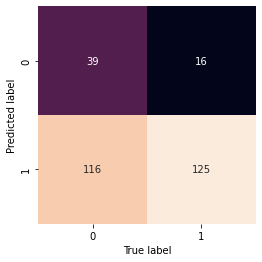

In [122]:
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

The following observations can be concluded about the performance:

 - 39 is the number of true positives i.e. The number of actual negative reviews that were predicted negatively be the model

 - 125 is the number of true negatives i.e. The number of actual positive reviews that were predicted positively be the model

 - 116 is the number of false positives i.e. The number of actual negative reviews that were predicted positively be the model

 - 16 is the number of false negatives i.e. The number of actual positive reviews that were predicted negatively be the model

In [123]:
score = accuracy_score(df_test1.Target, labels1)

In [124]:
score

0.5540540540540541

In [125]:
report = classification_report(df_test1.Target, labels1)

In [126]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.25      0.37       155
           1       0.52      0.89      0.65       141

    accuracy                           0.55       296
   macro avg       0.61      0.57      0.51       296
weighted avg       0.62      0.55      0.51       296

